# Sprint 機械学習スクラッチ クラスタリング
## K-meansスクラッチ



In [29]:
#基本ライブラリ
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [30]:
#scikit-learnライブラリ
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

#データセット
#from sklearn.datasets import load_iris

- クラスタリングのための人工データセット

クラスタリングを実験するための人工データセットを作成するコード。
このmake_blobs関数は正解ラベルも出力しているが、今回は使用しない。使用しないことを明示するために、 _（アンダースコア） で受け取っている。

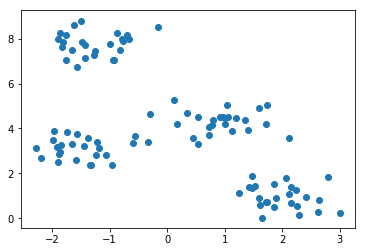

In [31]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:, 0],X[:, 1])
plt.show()

## 【問題１】中心点の初期値を求める

入力されたデータから K個の中心点 μ1からμKの初期値を決めるコードを作成する。

In [32]:
#データ点数の取得
x_nums = X.shape[0]

#μKの初期値を求める
k_nums = 4
start_point = np.random.choice(np.arange(0, x_nums), k_nums)
print(start_point)

[76 39 32 66]


## 【問題3】クラスタへの割り当て

全てのデータ点 Xnを最も近い中心点 μkに割り当てるコードを作成する。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることを意味する。

np.linalg.norm関数を利用して計算する。

In [33]:
#X0と各基準点との距離
distance = []
for i in range(4):
    distance.append(np.linalg.norm(X[0]-X[start_point[i]]))

print(distance)
print("最小値", min(distance))
print("クラス", distance.index(min(distance)))

[1.357912734557681, 2.885549827269717, 3.335523636913511, 3.081671239230324]
最小値 1.357912734557681
クラス 0


In [34]:
#X0ともっとも近い基準点のインデックスをクラスタとして割り当てる

#クラスタ列の追加
class_term = np.zeros(X.shape[0]).reshape(X.shape[0],1)
X = np.concatenate([X,class_term], 1)

print(X[0:20])

[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  0.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  0.        ]
 [-0.92819001  7.02698199  0.        ]
 [-1.74836345  7.06307447  0.        ]
 [-1.26789718  7.25141327  0.        ]
 [-0.98661744  7.74968685  0.        ]
 [-0.81984047  7.50994722  0.        ]
 [ 2.99684287  0.22378413  0.        ]
 [ 1.46870582  1.86947425  0.        ]
 [-0.33533163  3.390122    0.        ]
 [-1.86407034  2.93379754  0.        ]
 [ 2.62496786  0.28025075  0.        ]]


In [35]:
#距離を計算して最小クラスを割り当て

for i in range(x_nums):
    distance = []
    for j in range(k_nums):
        distance.append(np.linalg.norm(X[i]-X[start_point[j]]))
    X[i, 2] = distance.index(min(distance))

print(X[0:20])


[[ 0.72086751  3.71347124  0.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  0.        ]
 [ 1.59141542  4.90497725  0.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  3.        ]
 [-0.77354537  7.87923564  0.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  0.        ]
 [-0.92819001  7.02698199  0.        ]
 [-1.74836345  7.06307447  0.        ]
 [-1.26789718  7.25141327  0.        ]
 [-0.98661744  7.74968685  0.        ]
 [-0.81984047  7.50994722  0.        ]
 [ 2.99684287  0.22378413  2.        ]
 [ 1.46870582  1.86947425  2.        ]
 [-0.33533163  3.390122    0.        ]
 [-1.86407034  2.93379754  3.        ]
 [ 2.62496786  0.28025075  2.        ]]


## 【問題2】SSEを求める関数の作成

In [38]:
# |X0-μ0|^2
print(X[0, 0:2], "-" , X[start_point[0], 0:2])
print(X[0, 0:2] - X[start_point[0], 0:2])
print("距離", np.linalg.norm(X[0,0:2] - X[start_point[0], 0:2]))
print("二乗", (np.linalg.norm(X[0,0:2] - X[start_point[0], 0:2])**2))
print("クラス", X[0,2])

[0.72086751 3.71347124] - [-0.59312453  3.37090459]
[1.31399204 0.34256664]
距離 1.357912734557681
二乗 1.8439269946739187
クラス 0.0


In [9]:
def test_sum_squared_errors(X, k_nums, start_point):
    """
    クラスタ内誤差平方和（SSE）を求める関数
    
    ----
    X: 特徴量Xn＋クラス列（ndarray型）
    k_nums : クラス数（int型)
    start_point : 中心点（ndarray型）
    """
    tmp = []
    for i in range(X.shape[0]):
        for j in range(k_nums):
            if X[i, 2] == j:
                tmp.append(abs(X[i,0:2] - X[start_point[j], 0:2])**2)
    
    sse = sum(tmp)
    
    return sse


In [11]:
test_sum_squared_errors(X, k_nums, start_point)

array([55.46781913, 40.92887176])

## 【問題４】中心点の移動

中心点 μk を k番目のクラスタに割り当てられる全てのデータ点 Xnの平均値（重心）に移動するコードを作成する。

In [12]:
k_point = np.empty((k_nums, X.shape[1]-1))

for i in range(k_nums):
    k_point[i] = np.mean(X[np.where(X[:, 2] == i)], axis=0)[0:2]

print(k_point)

[[ 1.99186903  0.96561071]
 [-1.47935679  3.11716896]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]]


## 【問題５〜６】繰り返し・異なる初期値

クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成する。
次のどれかの条件を満たしたらこれを止める。
 - 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
 - 中心点 μkと重心の差が指定した許容値以下になる。（雛形では引数tol）

### 完成版クラス

In [186]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter=100, tol=1e-04, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  = tol
        self.verbose = verbose
        #各リストの初期化
        self.sse_ = []   #SSE
        self.start_point = []
        self.gravity_points_ = []
        self.best_point_ = []
        self.silhouette_ = []

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #データ点数の取得
        x_nums = X.shape[0]

        #μKの初期値を求める
        k_nums = self.n_clusters
        k_point = np.empty((k_nums, X.shape[1]))   #K点空のリスト

        #クラスタ列の追加
        class_term = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([X,class_term], 1)
        
        #開始位置の初期化
        for k in range(self.n_init):
            start_point = np.random.choice(np.arange(0, x_nums), k_nums)   #初期点インデックス
            self.start_point.append(start_point)   #開始点保存
            for i in range(k_nums):
                k_point[i] = X[start_point[i], 0:2]   #初期点インデックスのデータを格納

            #繰り返し処理（収束）
            for _ in range(self.max_iter):
                
                #所属クラスの更新
                for i in range(x_nums):
                    distance = []
                    for j in range(k_nums):
                        distance.append(np.linalg.norm(X[i, 0:2] - k_point[j]))
                    X[i, -1] = distance.index(min(distance))

                    """異なる実装
                    np.array([np.array([ 距離のスカラー（xで計算する） for 重心 in 重心リスト]).argmin() for x in X])
                    """
                k_old = np.copy(k_point)

                for i in range(k_nums):
                    k_point[i] = np.mean(X[np.where(X[:, 2] == i)], axis=0)[0:2]
                
                
                if np.linalg.norm(k_old[0] - k_point[0]) <= self.tol:
                    break
                
                #print(self.sum_squared_errors(X, k_point))

            #SSEの計算
            self.sse_.append(self.sum_squared_errors(X, k_point))
            
            #重心の保存
            self.gravity_points_.append(k_point)
 
        #最もスコアの良い重心ポイントの保存
        self.best_point_ = self.gravity_points_[self.sse_.index(min(self.sse_))]
        
        """
        シルエット分析用
        
        shilhouette_vals = np.zeros(X.shape[0])
        for i in range(x_nums):
            an = []   #凝集度
            bn = []   #乖離度
            cls = X[i, -1]   #所属クラス

            for j in X[np.where(X[:, -1]==cls)][:, 0:2]:   #クラスに属するサンプルを１行ずつ抽出
                an.append(np.linalg.norm(X[i, 0:2] - j))
            
            #お隣のクラス
            next_cls = np.array([])
            for k in range(k_nums):
                next_cls = np.append(next_cls, np.linalg.norm(Kmeans.best_point_[k] - X[i, 0:2]))
            argnum = next_cls.argsort()
            if k_nums == 1:
                next_cls = cls
            else:
                next_cls = np.where(argnum == k_nums-2)
                
            for x in X[np.where(X[:, -1]==next_cls)][:, 0:2]:   #クラスに属するサンプルを１行ずつ抽出
                bn.append(np.linalg.norm(X[i, 0:2] - x))
            
            ba = [sum(bn)/len(bn), sum(an)/len(an)]
            #シルエット係数の計算
            self.silhouette_.append((ba[0]-ba[1])/max(ba))
        """
     

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X, fullsize=False):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        #データ点数の取得
        x_nums = X.shape[0]
        
        #クラスタ列の追加
        class_term = np.zeros(X.shape[0]).reshape(X.shape[0],1)
        X = np.concatenate([X,class_term], 1)
 
        #所属クラスの更新
        for i in range(x_nums):
            distance = []
            for j in range(k_nums):
                distance.append(np.linalg.norm(X[i, 0:2] - self.best_point_[j]))
            X[i, -1] = distance.index(min(distance))
        
        if fullsize:
            y = X
        else:
            y = X[:, -1]
        
        return y
    
    def sum_squared_errors(self, X, k_point):
        """
        クラスタ内誤差平方和（SSE）を求める関数

        ----
        X: 特徴量Xn＋クラス列（ndarray型）
        k_nums : クラス数（int型)
        k_point : 中心点（ndarray型）
        """
        k_nums = self.n_clusters
        tmp = []
        for i in range(X.shape[0]):
            for j in range(k_nums):
                if X[i, 2] == j:
                    tmp.append((np.linalg.norm(X[i,0:2] - k_point[j]))**2)

        sse = sum(tmp)
        """
        np.sum((x - y)**2)
        """

        return sse

In [132]:
#テスト
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

Kmeans = ScratchKMeans(n_clusters=5, n_init=4, max_iter=100)
Kmeans.fit(X)

In [133]:
#Kmeanの値
Kmeans.sse_

[45.73756896756373, 44.56619784660821, 43.64880164633906, 130.68125388587083]

In [106]:
#初期点
Kmeans.start_point

[array([68, 71, 10, 57]),
 array([85, 74, 43, 46]),
 array([68, 13, 26, 20]),
 array([ 7, 13, 97, 60]),
 array([ 0, 23, 44, 42])]

In [107]:
#重心リスト
Kmeans.gravity_points_

[array([[ 0.92578447,  4.32475792],
        [ 1.99186903,  0.96561071],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.99186903,  0.96561071],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.99186903,  0.96561071],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.99186903,  0.96561071],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266]]), array([[ 0.92578447,  4.32475792],
        [ 1.99186903,  0.96561071],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266]])]

In [147]:
print(np.linalg.norm(Kmeans.best_point_[0] - X[0, 0:2]))
print(np.linalg.norm(Kmeans.best_point_[1] - X[0, 0:2]))
print(np.linalg.norm(Kmeans.best_point_[2] - X[0, 0:2]))
print(np.linalg.norm(Kmeans.best_point_[3] - X[0, 0:2]))
#np.argsort(Kmeans.best_point_ - X[0, 0:2],axis=0)

4.998072755211781
4.011853539620147
3.027570367914498
4.526732732421926


## 【問題７】推定

データ点 Xnを最も近い μkに割り当てる。

predictメソッドにて実装

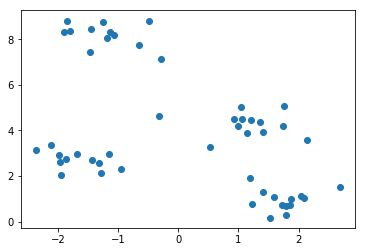

In [109]:
X_test, _ = make_blobs(n_samples=50, n_features=2, centers=4, cluster_std=0.51, shuffle=True, random_state=0)

plt.scatter(X_test[:, 0],X_test[:, 1])
plt.show()

In [110]:
Xy_pred = Kmeans.predict(X_test, fullsize=True)
y_pred = Kmeans.predict(X_test)

print(Xy_pred)

[[ 0.92362846  4.51319256  0.        ]
 [-1.86985884  2.73451015  2.        ]
 [ 1.73825041  4.19915661  0.        ]
 [-0.32575473  4.63713281  0.        ]
 [-1.06650891  8.19581233  3.        ]
 [ 1.87783233  0.97740163  1.        ]
 [-1.45920145  7.45425806  3.        ]
 [-0.64707819  7.74369835  3.        ]
 [-1.94160862  2.03747813  2.        ]
 [-1.97101056  2.62266893  2.        ]
 [-1.84654871  8.82670682  3.        ]
 [ 1.18506972  1.89255911  1.        ]
 [ 1.52050551  0.17345451  1.        ]
 [-1.98962618  2.94437441  2.        ]
 [ 1.73176325  0.71266567  1.        ]
 [ 0.99960692  4.20832356  0.        ]
 [ 1.41713254  3.92528317  0.        ]
 [-1.45387602  8.458907    3.        ]
 [-1.79433961  8.3732304   3.        ]
 [ 2.68271577  1.51087738  1.        ]
 [-1.43641668  2.71297398  2.        ]
 [ 1.59857958  1.09498393  1.        ]
 [ 1.41634189  1.29418374  1.        ]
 [ 1.36439932  4.36584159  0.        ]
 [-0.28784892  7.14810289  3.        ]
 [ 1.85773084  0.74348926

In [112]:



print(y_pred)

[0. 2. 0. 0. 3. 1. 3. 3. 2. 2. 3. 1. 1. 2. 1. 0. 0. 3. 3. 1. 2. 1. 1. 0.
 3. 1. 2. 2. 2. 0. 1. 0. 0. 2. 1. 0. 1. 2. 3. 0. 3. 1. 0. 3. 1. 3. 2. 0.
 2. 3.]


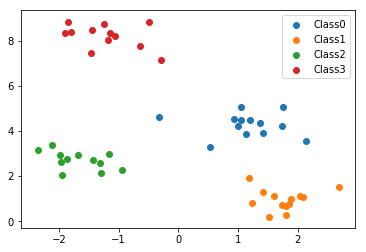

In [117]:
plt.scatter(Xy_pred[np.where(Xy_pred[:, 2]==0)][:, 0], Xy_pred[np.where(Xy_pred[:, 2]==0)][:, 1], label="Class0")
plt.scatter(Xy_pred[np.where(Xy_pred[:, 2]==1)][:, 0], Xy_pred[np.where(Xy_pred[:, 2]==1)][:, 1], label="Class1")
plt.scatter(Xy_pred[np.where(Xy_pred[:, 2]==2)][:, 0], Xy_pred[np.where(Xy_pred[:, 2]==2)][:, 1], label="Class2")
plt.scatter(Xy_pred[np.where(Xy_pred[:, 2]==3)][:, 0], Xy_pred[np.where(Xy_pred[:, 2]==3)][:, 1], label="Class3")
plt.legend()
plt.show()

In [137]:
for i in Xy_pred[np.where(Xy_pred[:, 2]==0)][:, 0:2]:
    print("データ：",i)

データ： [0.92362846 4.51319256]
データ： [1.73825041 4.19915661]
データ： [-0.32575473  4.63713281]
データ： [0.99960692 4.20832356]
データ： [1.41713254 3.92528317]
データ： [1.36439932 4.36584159]
データ： [1.75798748 5.0531603 ]
データ： [2.13384494 3.56206083]
データ： [1.05529327 4.49665021]
データ： [1.13593461 3.8681985 ]
データ： [0.52349935 3.29358113]
データ： [1.20264033 4.47396123]
データ： [1.0497323  5.04546682]


## 【問題８】エルボー法の実装

K-meansにおいて中心点の個数 kは人為的に決める必要があるが、その判断方法としてエルボー法がある。エルボー法により中心点の個数 k を検討するためのコードを作成する。

SSEを縦軸、クラスタ数 k を横軸にした折れ線グラフを表示する。このためにK-meansのインスタンスからはSSEを取得できるようにする。

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


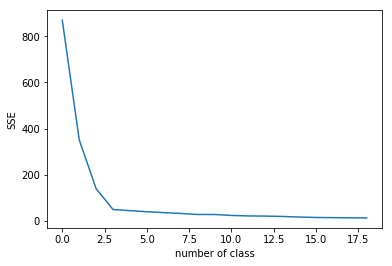

In [121]:
elbow = []

for i in range(1,20):
    Kmeans = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100)
    Kmeans.fit(X)
    elbow.append(min(Kmeans.sse_))

plt.ylabel("SSE")
plt.xlabel("number of class")
plt.plot(elbow)
plt.show()

## 【問題９】（アドバンス）シルエット図

k を決める助けになるものとしてシルエット図もある。シルエット図を表示するコードを作成する。

In [122]:
#シルエット図を表示するためのコード
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

NameError: name 'cluster_labels' is not defined

# クラスタ分析

クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用する。

これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータとなっている。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっている。顧客は小売店やレストラン。RegionとChannelは取り覗き、金額のデータでK-meansを利用する。

＜年間支出＞
- Fresh ：生鮮品
- Milk ：乳製品
- Grocery：食料品
- Frozen：冷凍品
- Detergents_Paper：洗剤および紙製品
- Delicatessen：デリカッセン商品

【参考】
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f

In [150]:
#データセットの概観

csv_path = "../Wholesale_customers_data.csv" # ファイル名（パス）を指定する

#np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
row_data = np.loadtxt(csv_path, delimiter=",", skiprows=1)

df_0 = pd.DataFrame(row_data, columns=["Channel","Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"])

df_0.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0
5,2.0,3.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0
6,2.0,3.0,12126.0,3199.0,6975.0,480.0,3140.0,545.0
7,2.0,3.0,7579.0,4956.0,9426.0,1669.0,3321.0,2566.0
8,1.0,3.0,5963.0,3648.0,6192.0,425.0,1716.0,750.0
9,2.0,3.0,6006.0,11093.0,18881.0,1159.0,7425.0,2098.0


In [153]:
df_0.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [154]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null float64
Region              440 non-null float64
Fresh               440 non-null float64
Milk                440 non-null float64
Grocery             440 non-null float64
Frozen              440 non-null float64
Detergents_Paper    440 non-null float64
Delicassen          440 non-null float64
dtypes: float64(8)
memory usage: 27.6 KB


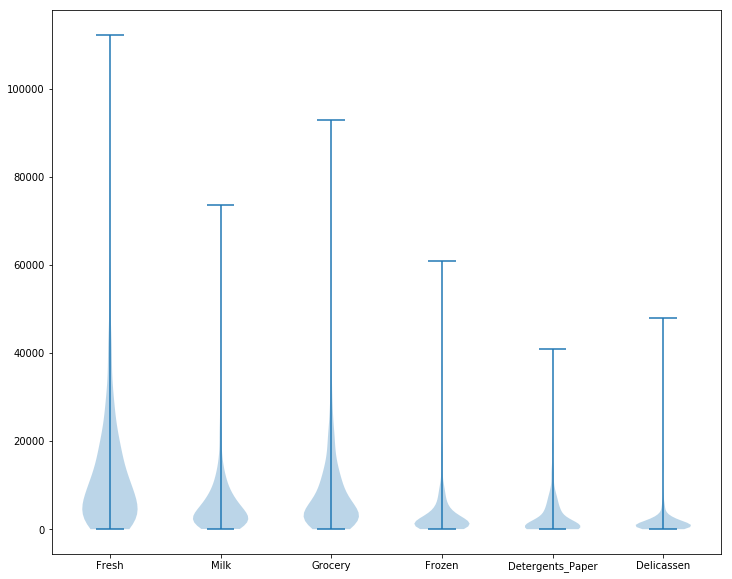

In [159]:
#バイオリンプロット
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.violinplot([df_0.Fresh, df_0.Milk, df_0.Grocery, df_0.Frozen, df_0.Detergents_Paper, df_0.Delicassen])
ax.set_xticklabels(["0","Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"])
plt.show()

## 次元削減

レッスンのために、データセットのChannelとRegionカラムを削除し、次元削減を行う。

In [163]:
df = df_0.drop(["Channel", "Region"], axis=1)
df.values

array([[12669.,  9656.,  7561.,   214.,  2674.,  1338.],
       [ 7057.,  9810.,  9568.,  1762.,  3293.,  1776.],
       [ 6353.,  8808.,  7684.,  2405.,  3516.,  7844.],
       ...,
       [14531., 15488., 30243.,   437., 14841.,  1867.],
       [10290.,  1981.,  2232.,  1038.,   168.,  2125.],
       [ 2787.,  1698.,  2510.,    65.,   477.,    52.]])

In [177]:
# 行列の標準化(次元削減は標準化必須)
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


In [169]:
#PCAのサンプルコード
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df.values)
data_pca = pca.transform(df.values)
print(data_pca[0:20])

[[   650.02212207   1585.51909007]
 [ -4426.80497937   4042.45150884]
 [ -4841.9987068    2578.762176  ]
 [   990.34643689  -6279.80599663]
 [ 10657.99873116  -2159.72581518]
 [ -2765.96159271   -959.87072713]
 [  -715.55089221  -2013.00226567]
 [ -4474.58366697   1429.49697204]
 [ -6712.09539718  -2205.90915598]
 [ -4823.63435407  13480.55920489]
 [ -7974.82898455   5711.21892518]
 [    36.39377903  -6037.89640947]
 [ 19940.20205019   4591.28647966]
 [  9396.69557902   5913.15703681]
 [ 12660.37043259   4541.94543497]
 [ -2997.72589991  -6093.8792994 ]
 [-10589.52355862   6584.21594303]
 [ -6367.09518029  -3680.71267259]
 [  6623.82533598   1254.71952554]
 [ -4861.53156911   -225.59226591]]


In [178]:
#標準化後のPCA
pca3 = PCA(n_components = 2)
pca3 = pca3.fit(dfs.values)
data_pca3 = pca3.transform(dfs.values)
print(data_pca3[0:20])

[[ 0.19307077 -0.30475306]
 [ 0.43392596 -0.32803921]
 [ 0.81022096  0.81416893]
 [-0.7777625   0.65201155]
 [ 0.16609819  1.26998809]
 [-0.15599237 -0.29480541]
 [-0.33490718 -0.52440632]
 [ 0.14042659 -0.23073005]
 [-0.51673134 -0.65861312]
 [ 1.59029884 -0.74016879]
 [ 0.63736044 -0.40136832]
 [-0.92663778 -0.21903791]
 [ 0.99023499  0.68513092]
 [ 0.84928002 -0.08559453]
 [ 0.84408297  0.1545484 ]
 [-0.95050341 -0.49534465]
 [ 0.55692477 -1.02495601]
 [-0.35213776  0.20684046]
 [ 0.31621861  0.44156366]
 [-0.32338762 -0.70278696]]


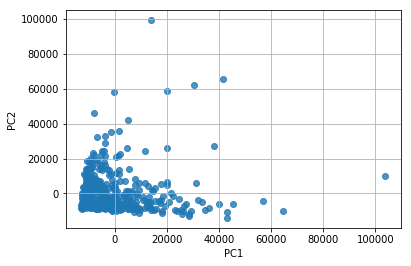

In [185]:
#標準化前
plt.scatter(data_pca[:, 0],data_pca[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

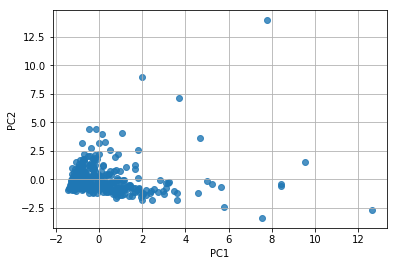

In [184]:
#標準化後
plt.scatter(data_pca3[:, 0],data_pca3[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


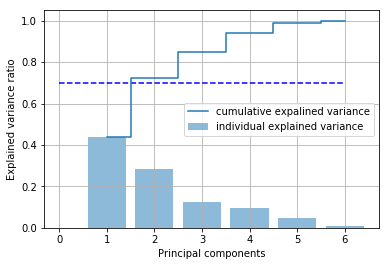

In [181]:
#PCAの分散説明率（累積寄与率）を表示するコードサンプル
#寄与率と累積寄与率は、第何主成分まででどのくらいの情報を説明できるかという指標

pca2 = PCA(n_components=None)
pca2 = pca2.fit(dfs.values)
var_exp = pca2.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [182]:
#PCAの固有ベクトル
pd.DataFrame(pca3.components_, columns=df.columns[:], index=["PC1", "PC2"])


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,0.042884,0.545118,0.579256,0.051189,0.548640,0.248682
PC2,0.527932,0.083168,-0.146088,0.611278,-0.255233,0.504207


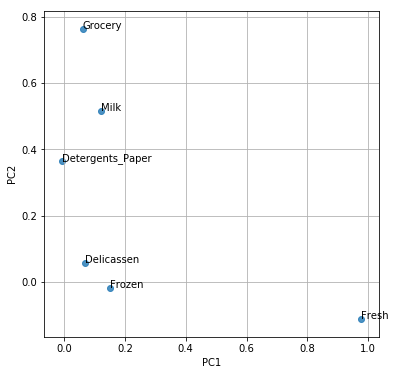

In [183]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## 【問題１０】クラスタ数kの選択


/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


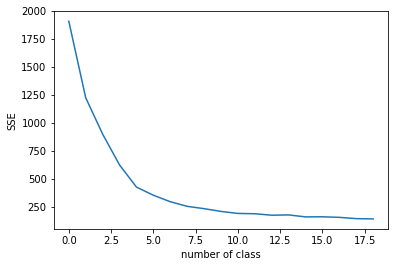

In [187]:
elbow = []

for i in range(1,20):
    Kmeans = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100)
    Kmeans.fit(data_pca3)
    elbow.append(min(Kmeans.sse_))

plt.ylabel("SSE")
plt.xlabel("number of class")
plt.plot(elbow)
plt.show()

2.5Kと５Kの間にエルボーが見られる。
したがって、K=5が適切と考えられる。

In [191]:
SKM = ScratchKMeans(n_clusters=5, n_init=10, max_iter=100)
SKM.fit(data_pca3)
pred = SKM.predict(data_pca3, fullsize=True)
print(pred)

[[ 0.19307077 -0.30475306  1.        ]
 [ 0.43392596 -0.32803921  2.        ]
 [ 0.81022096  0.81416893  0.        ]
 ...
 [ 3.46176308 -1.0386557   2.        ]
 [-0.91697893 -0.03001243  1.        ]
 [-1.10388054 -0.86035852  1.        ]]


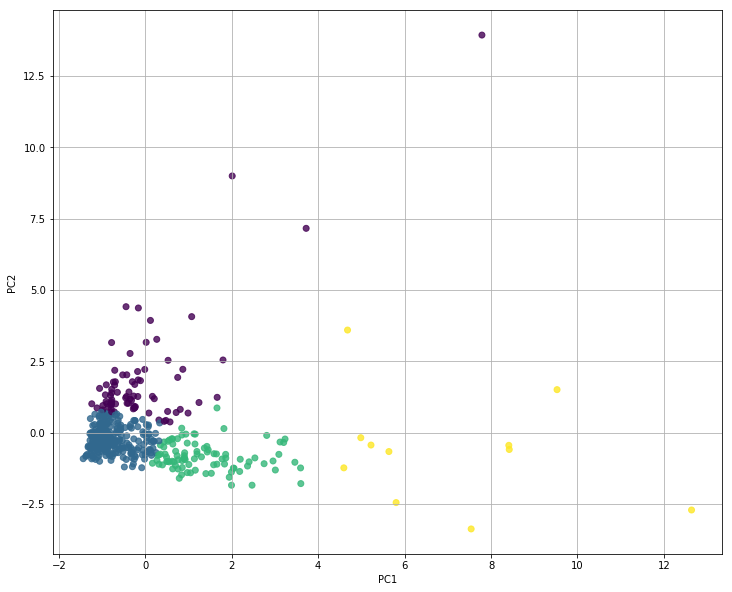

In [192]:
#プロット
plt.figure(figsize=(12,10))
plt.scatter(data_pca3[:, 0],data_pca3[:, 1], alpha=0.8, c= list(pred[:, 2]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## 【問題11】既知のグループとの比較

In [193]:
data_pca3.shape

(440, 2)

In [195]:
df_0.iloc[:, 0:2].values.

(440, 2)

In [197]:
comp = np.concatenate([pred, df_0.iloc[:, 0:2].values],1)
print(comp)

[[ 0.19307077 -0.30475306  1.          2.          3.        ]
 [ 0.43392596 -0.32803921  2.          2.          3.        ]
 [ 0.81022096  0.81416893  0.          2.          3.        ]
 ...
 [ 3.46176308 -1.0386557   2.          2.          3.        ]
 [-0.91697893 -0.03001243  1.          1.          3.        ]
 [-1.10388054 -0.86035852  1.          1.          3.        ]]


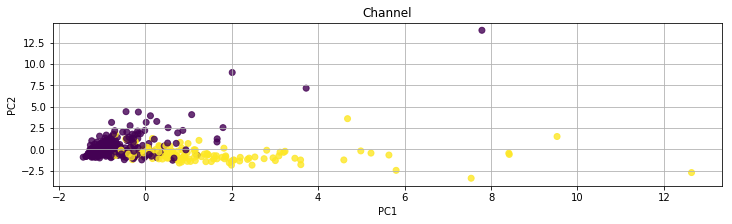

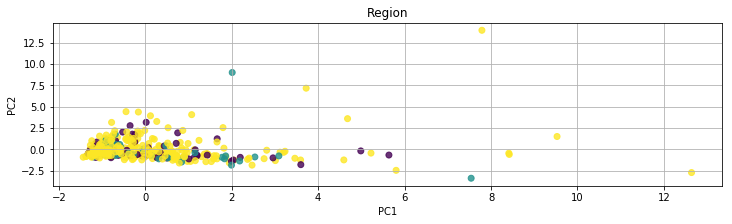

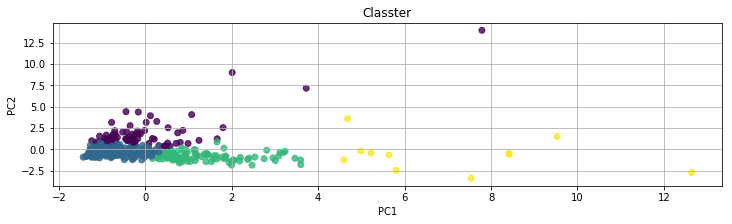

In [204]:
#プロット
plt.figure(figsize=(12,3))
plt.scatter(comp[:, 0], comp[:, 1], alpha=0.8, c= list(comp[:, 3]))
plt.grid()
plt.title("Channel")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(12,3))
plt.scatter(comp[:, 0], comp[:, 1], alpha=0.8, c= list(comp[:, 4]))
plt.grid()
plt.title("Region")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

plt.figure(figsize=(12,3))
plt.scatter(comp[:, 0], comp[:, 1], alpha=0.8, c= list(comp[:, 2]))
plt.grid()
plt.title("Classter")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 分析


In [212]:
df_2 = pd.DataFrame(np.concatenate([df_0.values, pred[:, 2].reshape(-1,1)], 1),
                   columns=["Channel","Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen", "Classter"])
df_2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Classter
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,1.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0.0


In [214]:
df_2.groupby("Channel").mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Classter
Channel,,,,,,,,
1.0,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,0.805369
2.0,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,1.661972


In [216]:
df_2.groupby("Region").mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Classter
Region,,,,,,,,
1.0,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,1.090909
2.0,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,1.148936
3.0,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,1.069620


In [215]:
df_2.groupby("Classter").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Classter,,,,,,,,
0.0,1.155844,2.597403,28902.376623,6131.337662,6011.103896,8691.246753,1010.792208,3184.467532
1.0,1.134100,2.528736,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2.0,1.923077,2.538462,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
3.0,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636


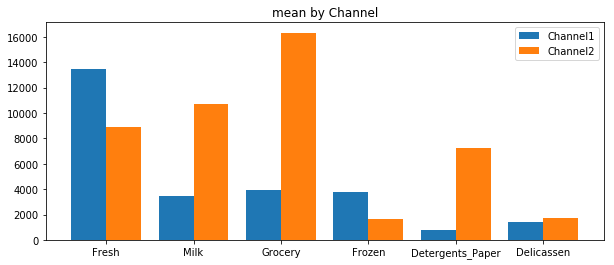

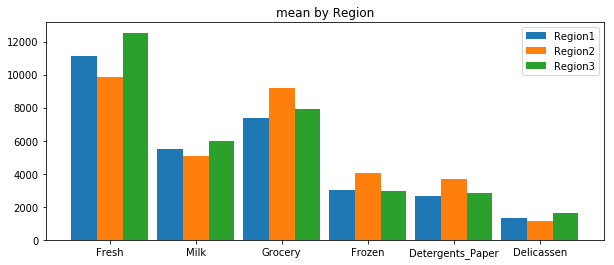

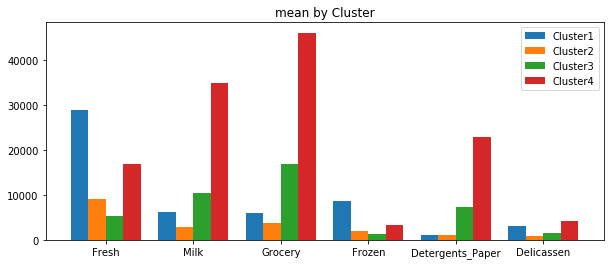

In [227]:
#bar chart
xname = np.array(["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"])
xposition = np.arange(len(xname))

#Channel
y_c1 = df_2.groupby("Channel").mean().values[0,1:7]
y_c2 = df_2.groupby("Channel").mean().values[1,1:7]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(xposition, y_c1, width=0.4, label="Channel1")
ax.bar(xposition+0.4, y_c2, width=0.4, label="Channel2")
ax.legend()
plt.title("mean by Channel")
ax.set_xticks(xposition + 0.2)
ax.set_xticklabels(xname)
plt.show()

#Region
y_r1 = df_2.groupby("Region").mean().values[0,1:7]
y_r2 = df_2.groupby("Region").mean().values[1,1:7]
y_r3 = df_2.groupby("Region").mean().values[2,1:7]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(xposition, y_r1, width=0.3, label="Region1")
ax.bar(xposition+0.3, y_r2, width=0.3, label="Region2")
ax.bar(xposition+0.6, y_r3, width=0.3, label="Region3")
ax.legend()
plt.title("mean by Region")
ax.set_xticks(xposition + 0.3)
ax.set_xticklabels(xname)
plt.show()

#Classter
y_cl1 = df_2.groupby("Classter").mean().values[0,2:8]
y_cl2 = df_2.groupby("Classter").mean().values[1,2:8]
y_cl3 = df_2.groupby("Classter").mean().values[2,2:8]
y_cl4 = df_2.groupby("Classter").mean().values[3,2:8]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.bar(xposition, y_cl1, width=0.2, label="Cluster1")
ax.bar(xposition+0.2, y_cl2, width=0.2, label="Cluster2")
ax.bar(xposition+0.4, y_cl3, width=0.2, label="Cluster3")
ax.bar(xposition+0.6, y_cl4, width=0.2, label="Cluster4")
ax.legend()
plt.title("mean by Cluster")
ax.set_xticks(xposition + 0.3)
ax.set_xticklabels(xname)
plt.show()

- Cluster1と２は、Channel1の中で傾向がよりはっきりしたもの（生鮮品の消費が大きい）を分けている
  - Channel１は飲食店？
- Cluster3と４は、Channel2の中で傾向がよりはっきりしたもの（乳製品・食料品の消費が大きい）を分けている
  - Channel２は一般家庭？

## 【問題12】卸売業者にとって有益な情報

In [233]:
#Channel1の中でRegionの傾向
df_2.groupby("Channel").get_group(1).groupby("Region").size()

Region
1.0     59
2.0     28
3.0    211
dtype: int64

In [238]:
#Channel２の中でRegionの傾向
df_2.groupby("Channel").get_group(2).groupby("Region").size()

Region
1.0     18
2.0     19
3.0    105
dtype: int64

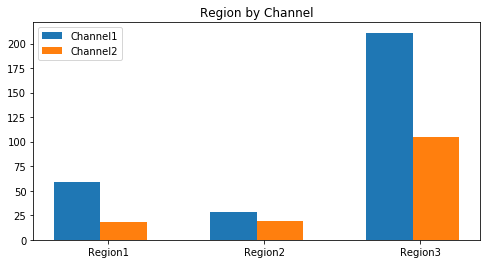

In [237]:
#可視化
xname = np.array(["Region1", "Region2", "Region3"])
xposition = np.arange(len(xname))

#Channel
y_c1 = df_2.groupby("Channel").get_group(1).groupby("Region").size().values
y_c2 = df_2.groupby("Channel").get_group(2).groupby("Region").size().values

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.bar(xposition, y_c1, width=0.3, label="Channel1")
ax.bar(xposition+0.3, y_c2, width=0.3, label="Channel2")
ax.legend()
plt.title("Region by Channel")
ax.set_xticks(xposition + 0.2)
ax.set_xticklabels(xname)
plt.show()

In [255]:
#クラスをさらにクラスタで分ける
list = []
for i in range(1,3):
    for j in range(1,4):
        list.append(df_2.groupby("Channel").get_group(i).groupby("Region").get_group(j).groupby("Classter").size().values.tolist())
print(list)

[[11, 45, 3], [5, 23], [49, 158, 4], [1, 3, 12, 2], [2, 4, 12, 1], [9, 28, 60, 8]]


In [256]:
#欠損クラスタ調整
list[0].append(0)
list[1].append(0)
list[1].append(0)
list[2].append(0)
print(list)


[[11, 45, 3, 0], [5, 23, 0, 0], [49, 158, 4, 0], [1, 3, 12, 2], [2, 4, 12, 1], [9, 28, 60, 8]]


In [290]:
#割合
p_r1_c1_cl1 = round(list[0][0]/sum(list[0]),3)*100
p_r1_c1_cl2 = round(list[0][1]/sum(list[0]),3)*100
p_r2_c1_cl1 = round(list[1][0]/sum(list[1]),3)*100
p_r2_c1_cl2 = round(list[1][1]/sum(list[1]),3)*100
p_r3_c1_cl1 = round(list[2][0]/sum(list[2]),3)*100
p_r3_c1_cl2 = round(list[2][1]/sum(list[2]),3)*100

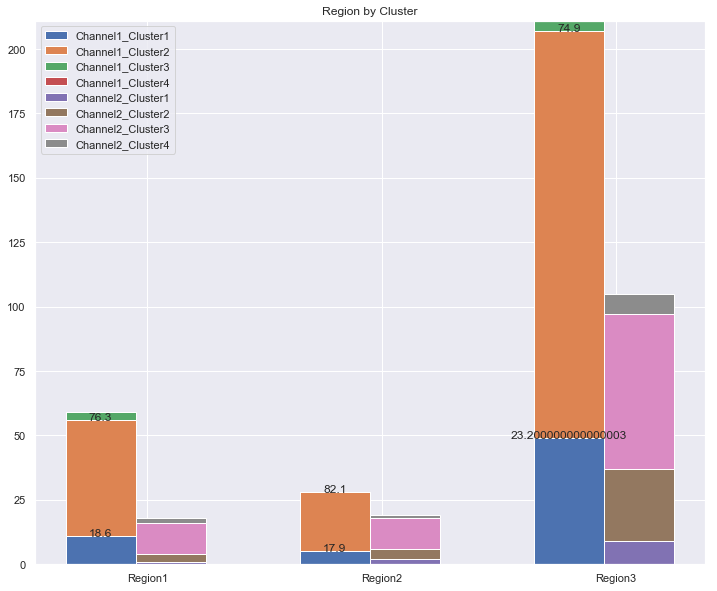

In [297]:
#可視化

xname = np.array(["Region1", "Region2", "Region3"])
xposition = np.arange(len(xname))

#Channel
y_c1_cl1 = np.array([list[0][0], list[1][0], list[2][0]])
y_c1_cl2 = np.array([list[0][1], list[1][1], list[2][1]])
y_c1_cl3 = np.array([list[0][2], list[1][2], list[2][2]])
y_c1_cl4 = np.array([list[0][3], list[1][3], list[2][3]])

y_c2_cl1 = np.array([list[3][0], list[4][0], list[5][0]])
y_c2_cl2 = np.array([list[3][1], list[4][1], list[5][1]])
y_c2_cl3 = np.array([list[3][2], list[4][2], list[5][2]])
y_c2_cl4 = np.array([list[3][3], list[4][3], list[5][3]])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

#チャネル１
ax.bar(xposition, y_c1_cl1, width=0.3, label="Channel1_Cluster1")
ax.bar(xposition, y_c1_cl2, width=0.3, label="Channel1_Cluster2", bottom=y_c1_cl1)
ax.bar(xposition, y_c1_cl3, width=0.3, label="Channel1_Cluster3", bottom=y_c1_cl1+y_c1_cl2)
ax.bar(xposition, y_c1_cl4, width=0.3, label="Channel1_Cluster4", bottom=y_c1_cl1+y_c1_cl2+y_c1_cl3)

#チャネル２
ax.bar(xposition+0.3, y_c2_cl1, width=0.3, label="Channel2_Cluster1")
ax.bar(xposition+0.3, y_c2_cl2, width=0.3, label="Channel2_Cluster2",  bottom=y_c2_cl1)
ax.bar(xposition+0.3, y_c2_cl3, width=0.3, label="Channel2_Cluster3",  bottom=y_c2_cl1+y_c2_cl2)
ax.bar(xposition+0.3, y_c2_cl4, width=0.3, label="Channel2_Cluster4",  bottom=y_c2_cl1+y_c2_cl2+y_c2_cl3)

#パーセントラベル
plt.text(0, y_c1_cl1[0], p_r1_c1_cl1, ha="center")
plt.text(0, y_c1_cl1[0]+y_c1_cl2[0], p_r1_c1_cl2, ha="center")
plt.text(1, y_c1_cl1[1], p_r2_c1_cl1, ha="center")
plt.text(1, y_c1_cl1[1]+y_c1_cl2[1], p_r2_c1_cl2, ha="center")
plt.text(2, y_c1_cl1[2], p_r3_c1_cl1, ha="center")
plt.text(2, y_c1_cl1[2]+y_c1_cl2[2], p_r3_c1_cl2, ha="center")

ax.legend()
plt.title("Region by Cluster")
ax.set_xticks(xposition + 0.2)
ax.set_xticklabels(xname)
plt.show()

【分析】

- Region1はチャネル１が多数で、少額支出の顧客が76%を占めている
- Region2はチャネル１、２ともに同じ水準で、パーセンテージもそれほど変わらない
- Region3は、他のRegionに比べて高額支出の顧客が割合、数ともに多い

【小売業者への提言１】

- Region3のチャネル１顧客を狙うと効率よく稼げる（ビックアカウント＋潜在ニーズ）
- 在庫管理的にも狙うならRegion3か、Region2

### 一部の特徴量で分析

チャネルが生鮮品か、食料品か、どちらかに偏っていることがよくわかった。

専門商社であればそれでも良いだろうが、オールマイティな小売業社などが進出したい場合、どう考えれば良いだろう。

ここで、チャネルの傾向がよく表れているFreshとGroceryでクラスタリングしてみる。

つまり、ここでの問いは、**生鮮品も食料品も同レベルで消費してくれるクラスタが無いか？**ということ

In [298]:
df_4 = df_0.drop(["Channel", "Region", "Milk", "Frozen", "Detergents_Paper", "Delicassen"], axis=1)
df_4.values

array([[1.26690e+04, 7.56100e+03],
       [7.05700e+03, 9.56800e+03],
       [6.35300e+03, 7.68400e+03],
       [1.32650e+04, 4.22100e+03],
       [2.26150e+04, 7.19800e+03],
       [9.41300e+03, 5.12600e+03],
       [1.21260e+04, 6.97500e+03],
       [7.57900e+03, 9.42600e+03],
       [5.96300e+03, 6.19200e+03],
       [6.00600e+03, 1.88810e+04],
       [3.36600e+03, 1.29740e+04],
       [1.31460e+04, 4.52300e+03],
       [3.17140e+04, 1.17570e+04],
       [2.12170e+04, 1.49820e+04],
       [2.46530e+04, 1.20910e+04],
       [1.02530e+04, 3.82100e+03],
       [1.02000e+03, 1.21210e+04],
       [5.87600e+03, 2.93300e+03],
       [1.86010e+04, 1.00990e+04],
       [7.78000e+03, 9.46400e+03],
       [1.75460e+04, 4.60200e+03],
       [5.56700e+03, 2.01000e+03],
       [3.12760e+04, 4.46900e+03],
       [2.63730e+04, 2.20190e+04],
       [2.26470e+04, 1.37920e+04],
       [1.61650e+04, 7.59500e+03],
       [9.89800e+03, 2.86100e+03],
       [1.42760e+04, 3.04500e+03],
       [4.11300e+03,

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


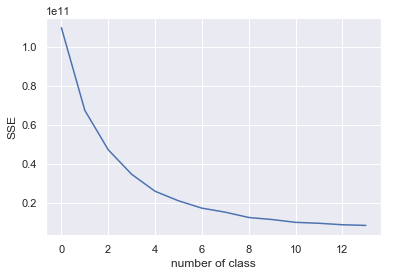

In [300]:
elbow = []

for i in range(1,15):
    Kmeans = ScratchKMeans(n_clusters=i, n_init=10, max_iter=100)
    Kmeans.fit(df_4.values)
    elbow.append(min(Kmeans.sse_))

plt.ylabel("SSE")
plt.xlabel("number of class")
plt.plot(elbow)
plt.show()

In [301]:
SKM2 = ScratchKMeans(n_clusters=10, n_init=10, max_iter=100)
SKM2.fit(df_4.values)
pred = SKM2.predict(df_4.values, fullsize=True)

[[1.2669e+04 7.5610e+03 0.0000e+00]
 [7.0570e+03 9.5680e+03 0.0000e+00]
 [6.3530e+03 7.6840e+03 0.0000e+00]
 ...
 [1.4531e+04 3.0243e+04 2.0000e+00]
 [1.0290e+04 2.2320e+03 0.0000e+00]
 [2.7870e+03 2.5100e+03 0.0000e+00]]


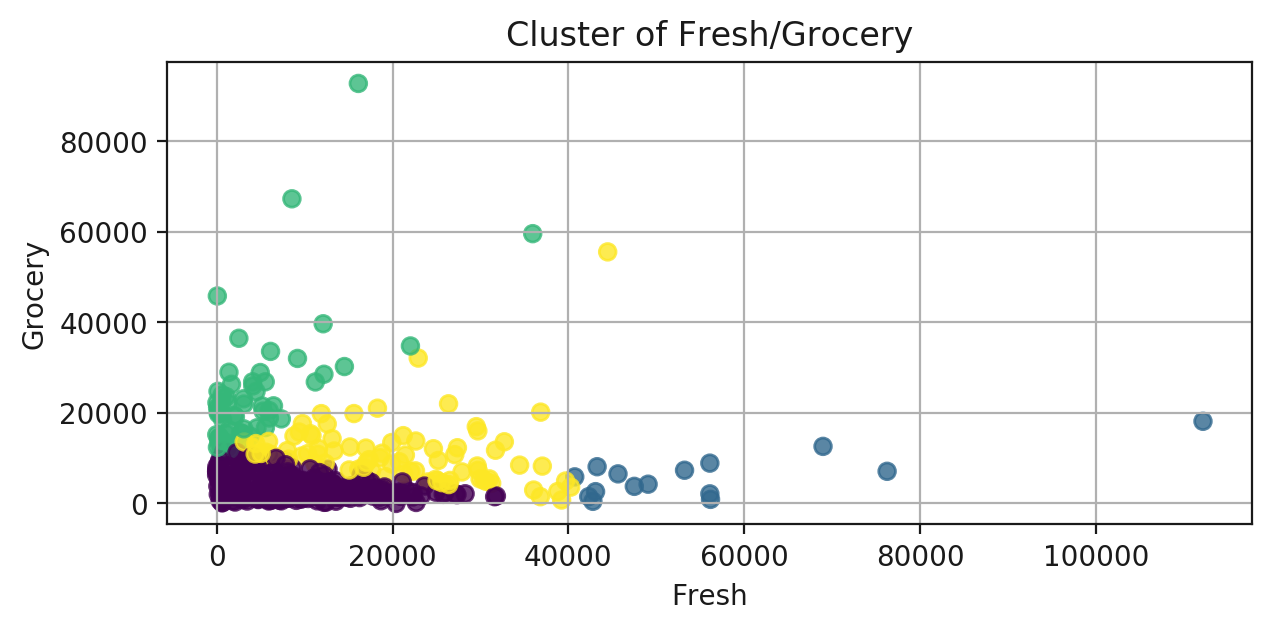

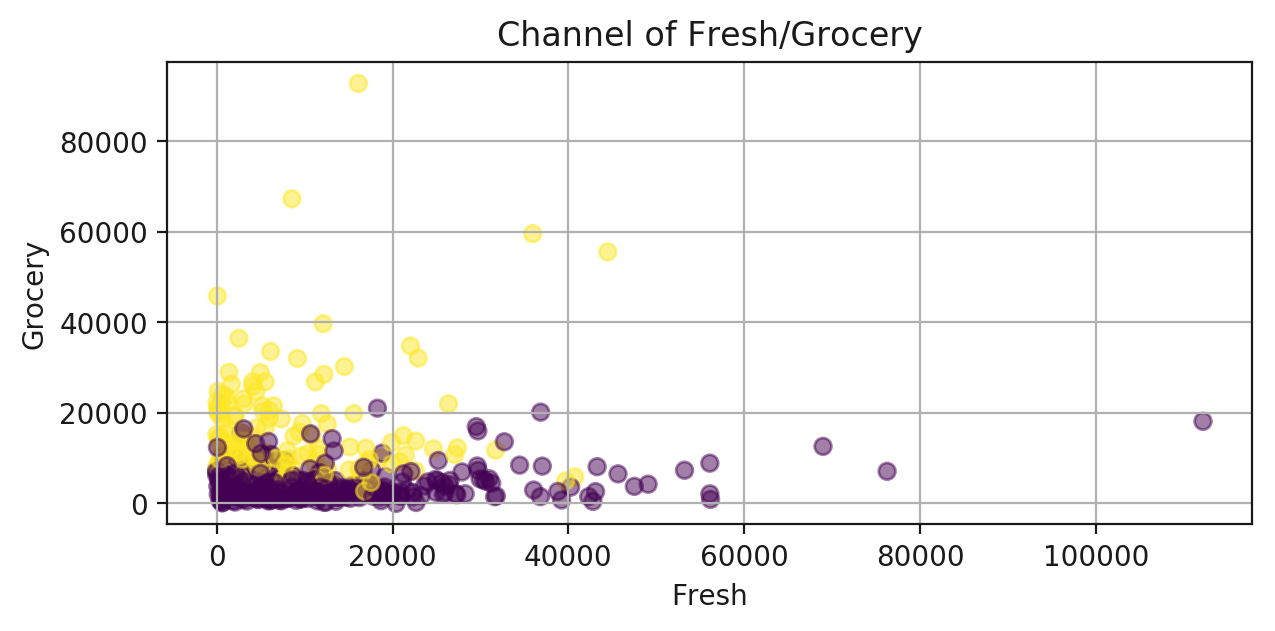

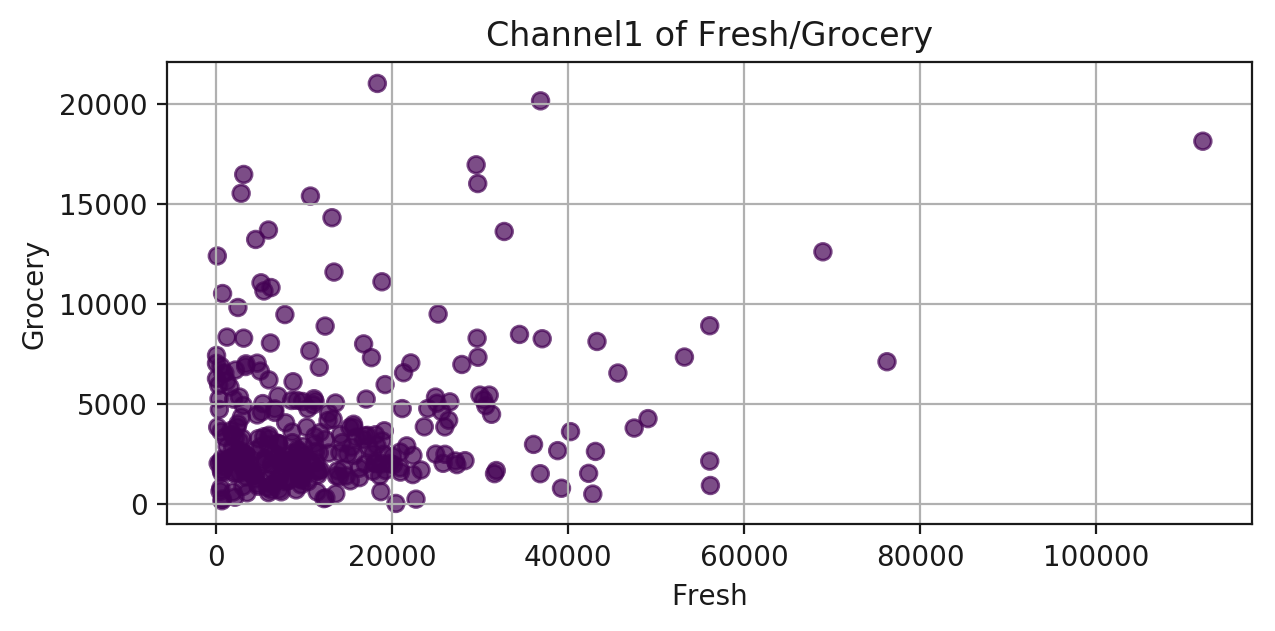

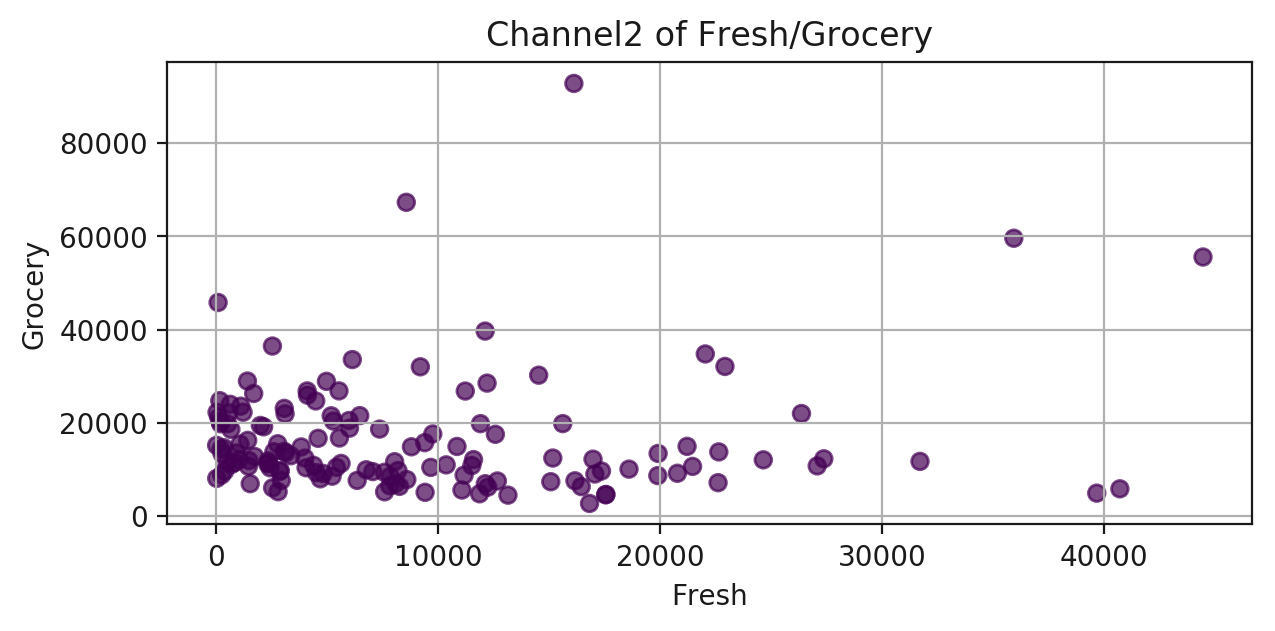

In [322]:
#プロット
plt.figure(figsize=(7,3))
plt.scatter(pred[:, 0],pred[:, 1], alpha=0.8, c=pred[:, 2])
plt.grid()
plt.title("Cluster of Fresh/Grocery")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

plt.figure(figsize=(7,3))
plt.scatter(df_0.iloc[:, 2], df_0.iloc[:, 4], alpha=0.5, c=df_0.iloc[:, 0])
plt.grid()
plt.title("Channel of Fresh/Grocery")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

plt.figure(figsize=(7,3))
plt.scatter(df_0.query("Channel == 1").iloc[:, 2],
            df_0.query("Channel ==1").iloc[:, 4], alpha=0.7,
            c=df_0.query("Channel ==1").iloc[:, 0])
plt.grid()
plt.title("Channel1 of Fresh/Grocery")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

plt.figure(figsize=(7,3))
plt.scatter(df_0.query("Channel == 2").iloc[:, 2],
            df_0.query("Channel ==2").iloc[:, 4], alpha=0.7,
            c=df_0.query("Channel ==2").iloc[:, 0])
plt.grid()
plt.title("Channel2 of Fresh/Grocery")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()



In [323]:
df_5 = pd.DataFrame(np.concatenate([df_0.values, pred[:,2].reshape(-1,1)], 1),
                   columns=["Channel","Region", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen", "Cluster"])
df_5.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,3.0


In [324]:
df_5.groupby("Cluster").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0.0,1.146953,2.516129,8772.111111,3100.232975,3624.745520,2908.175627,1067.519713,1015.906810
1.0,1.066667,2.600000,55549.066667,5122.333333,6018.466667,7278.000000,1265.466667,2907.133333
2.0,1.950000,2.450000,4438.733333,13273.016667,24132.166667,1311.150000,10848.633333,1723.416667
3.0,1.500000,2.686047,20152.930233,9443.906977,11035.476744,4098.023256,3489.755814,2796.430233


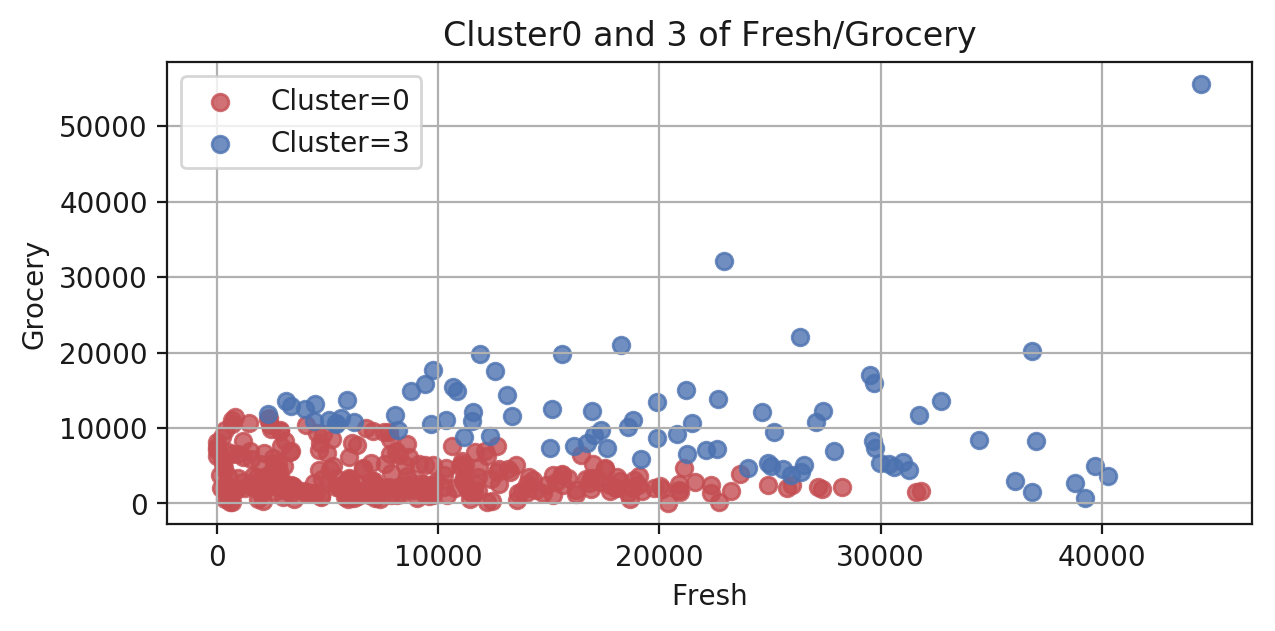

In [327]:
#中間クラスタのみ表示
plt.figure(figsize=(7,3))
plt.scatter(df_5.query("Cluster == 0").iloc[:, 2],
            df_5.query("Cluster ==0").iloc[:, 4], 
            alpha=0.8,
            c="r",
            label="Cluster=0")
plt.scatter(df_5.query("Cluster == 3").iloc[:, 2],
            df_5.query("Cluster ==3").iloc[:, 4],
            alpha=0.8,
            c="b",
            label="Cluster=3")
plt.legend()
plt.grid()
plt.title("Cluster0 and 3 of Fresh/Grocery")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.show()

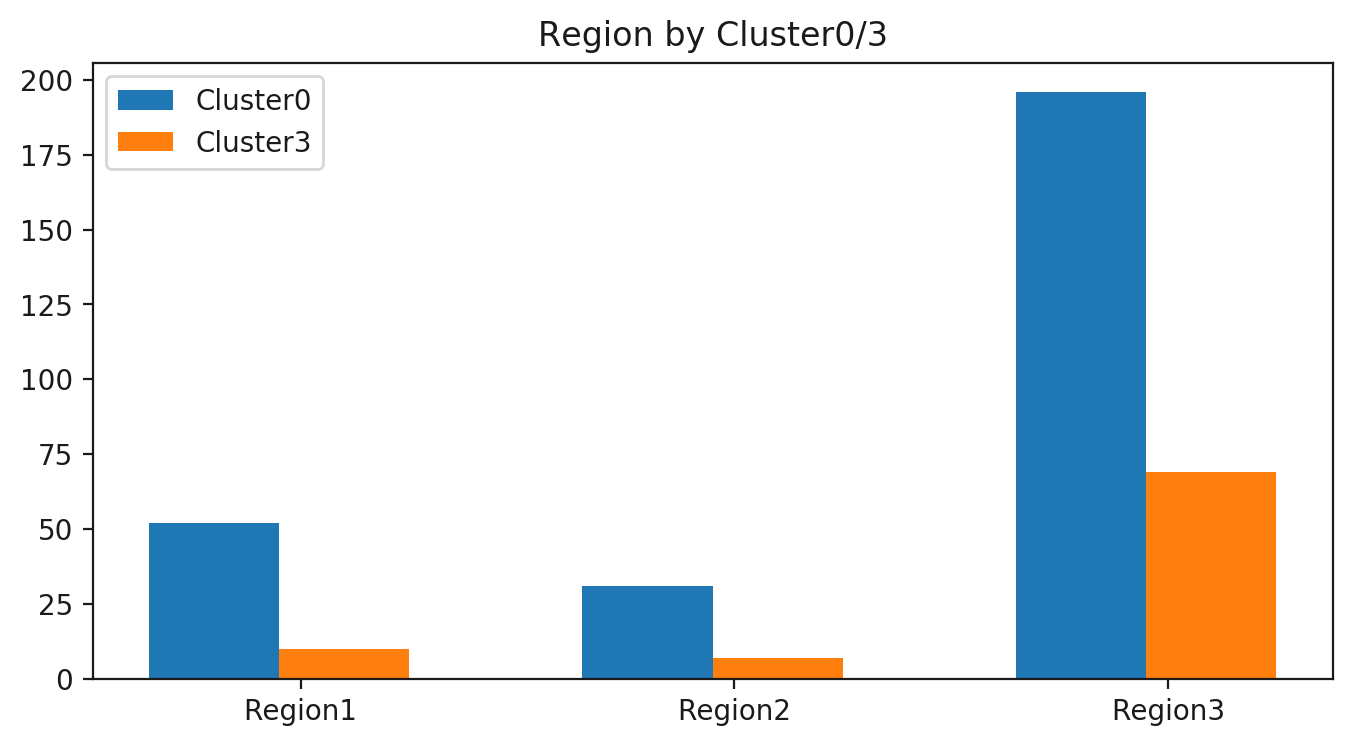

In [328]:
#regionごとの数
xname = np.array(["Region1", "Region2", "Region3"])
xposition = np.arange(len(xname))

#Channel
y_c1 = df_5.groupby("Cluster").get_group(0).groupby("Region").size().values
y_c2 = df_5.groupby("Cluster").get_group(3).groupby("Region").size().values

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.bar(xposition, y_c1, width=0.3, label="Cluster0")
ax.bar(xposition+0.3, y_c2, width=0.3, label="Cluster3")
ax.legend()
plt.title("Region by Cluster0/3")
ax.set_xticks(xposition + 0.2)
ax.set_xticklabels(xname)
plt.show()

【結論】

 - Region3が総合商店も営業しやすそう